In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

List of available datasets for sm.datasets.get_rdataset() https://vincentarelbundock.github.io/Rdatasets/articles/data.html

In [2]:
df = sm.datasets.get_rdataset("Duncan", "carData").data #prestige dataset

In [ ]:
df.info()

In [ ]:
df.type.value_counts()

In [ ]:
sns.displot(df['income'])

In [ ]:
sns.displot(df['income'])

In [ ]:
sns.pairplot(df, kind='reg')

In [ ]:
df.head()

https://www.statsmodels.org/stable/examples/notebooks/generated/regression_plots.html

In [3]:
prestige_model = smf.ols("prestige ~ income + education", data=df).fit()
prestige_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prestige   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     101.2
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           8.65e-17
Time:                        11:24:49   Log-Likelihood:                -178.98
No. Observations:                  45   AIC:                             364.0
Df Residuals:                      42   BIC:                             369.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.0647      4.272     -1.420      0.163     -14.686       2.556
income         0.5987      0.120      5.003      0.000       0.357       0.840
education      0.5458      0.098      5.555      0.000       0.348       0.744
==============================================================================
Omnibus:                        1.279   Durbin-Watson:                   1.458
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.520
Skew:                           0.155   Prob(JB):                        0.771
Kurtosis:                       3.426   Cond. No.                         163.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Influence plots
Influence plots show the (externally) studentized residuals vs. the leverage of each observation as measured by the hat matrix.

Externally studentized residuals are residuals that are scaled by their standard deviation

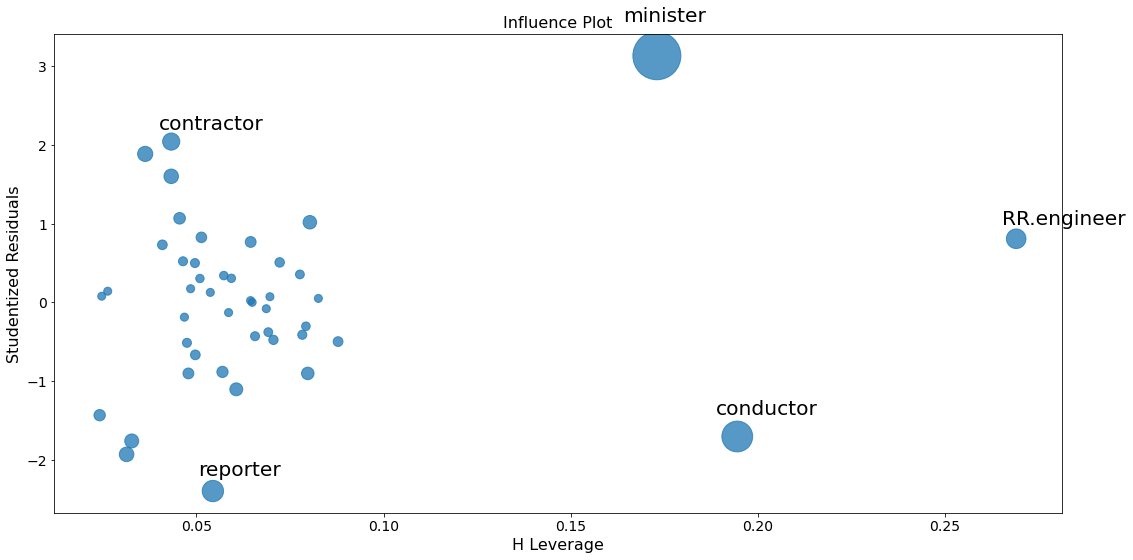

In [4]:
plt.rc("figure", figsize=(16,8))
plt.rc("font", size=14)
fig = sm.graphics.influence_plot(prestige_model, criterion="cooks")
fig.tight_layout(pad=1.0)

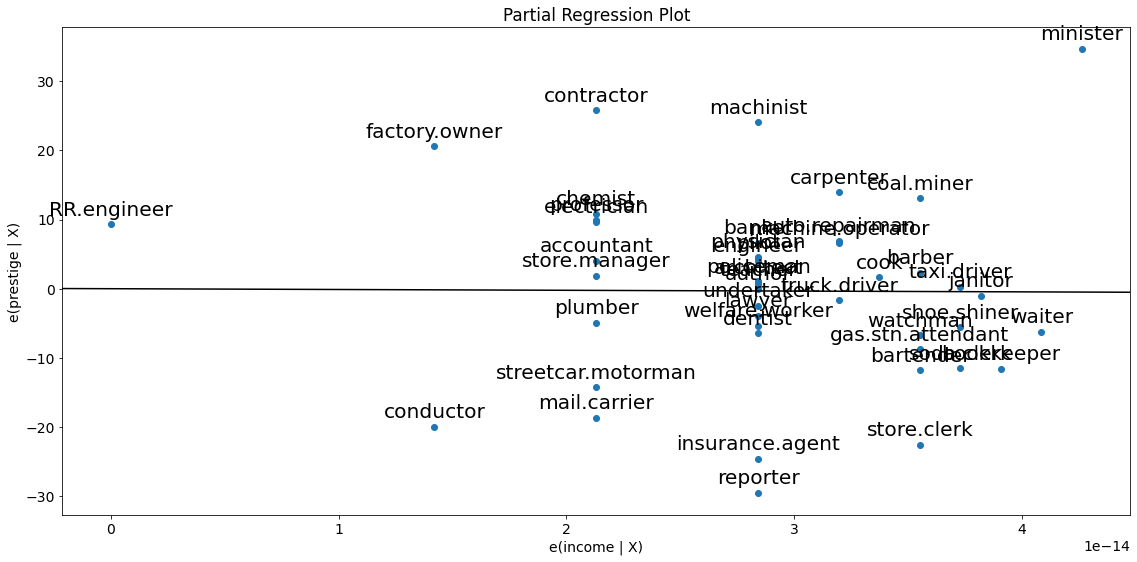

In [6]:
fig = sm.graphics.plot_partregress("prestige", "income", ["income", "education"], data=df)
fig.tight_layout(pad=1.0)

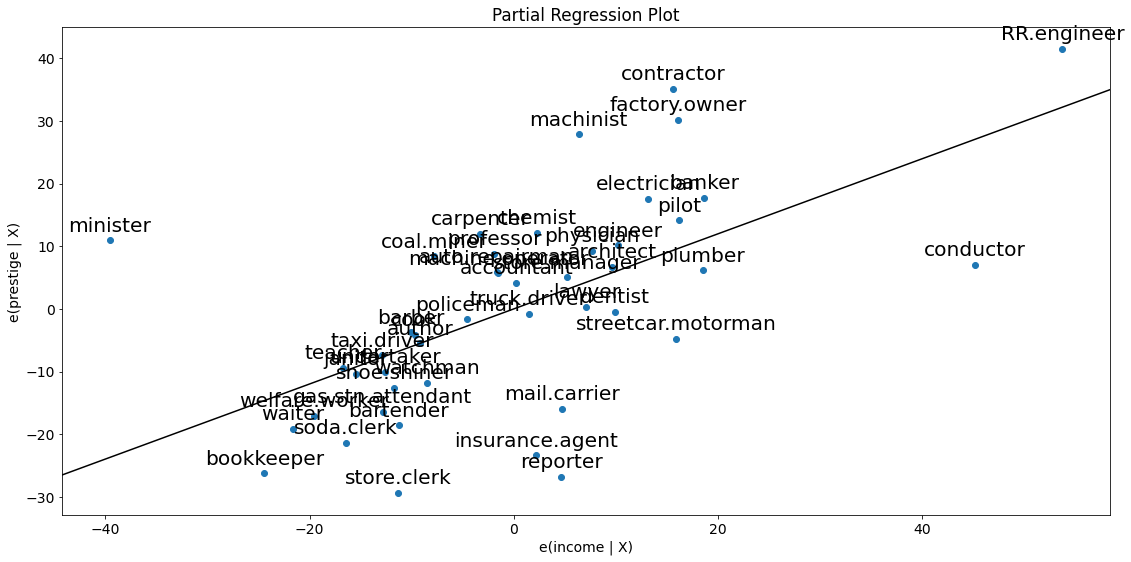

In [7]:
fig = sm.graphics.plot_partregress("prestige", "income", ["education"], data=df)
fig.tight_layout(pad=1.0)

As you can see the partial regression plot confirms the influence of conductor, minister, and RR.engineer on the partial relationship between income and prestige. The cases greatly decrease the effect of income on prestige. Dropping these cases confirms this.

In [9]:
subset = ~df.index.isin(["conductor", "RR.engineer", "minister"])
prestige_model2 = smf.ols("prestige ~ income + education", data=df, subset=subset).fit()
print(prestige_model2.summary())

                            OLS Regression Results                            
Dep. Variable:               prestige   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     138.1
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           2.02e-18
Time:                        11:27:18   Log-Likelihood:                -160.59
No. Observations:                  42   AIC:                             327.2
Df Residuals:                      39   BIC:                             332.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.3174      3.680     -1.717      0.0

For a quick check of all the regressors, you can use plot_partregress_grid. These plots will not label the points, but you can use them to identify problems and then use plot_partregress to get more information.



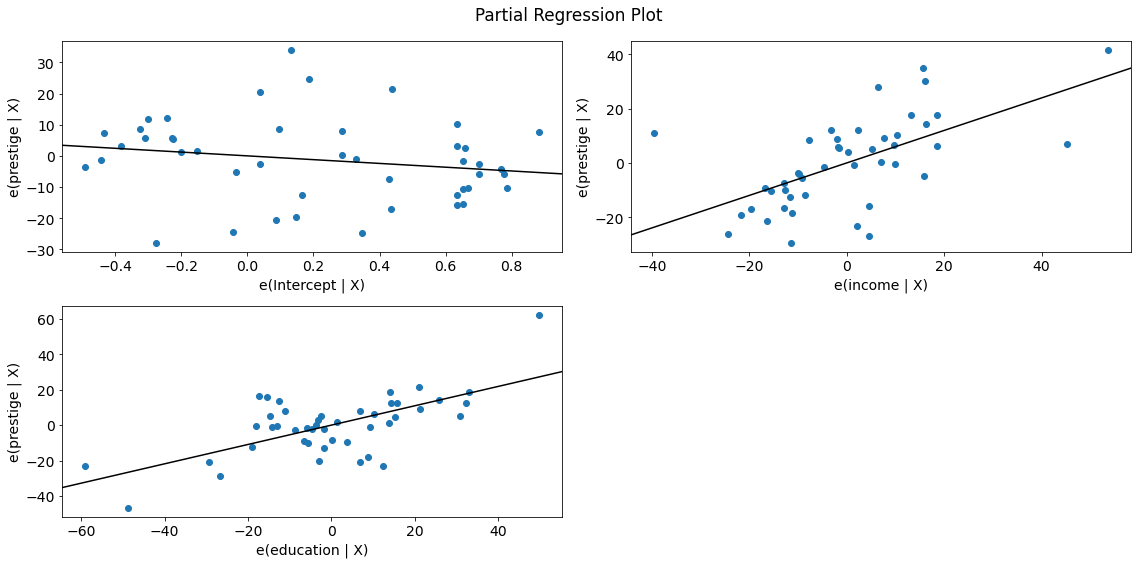

In [10]:
fig = sm.graphics.plot_partregress_grid(prestige_model)
fig.tight_layout(pad=1.0)

## Single Variable Regression Diagnostics
The plot_regress_exog function is a convenience function that gives a 2x2 plot containing the dependent variable and fitted values with confidence intervals vs. the independent variable chosen, the residuals of the model vs. the chosen independent variable, a partial regression plot, and a CCPR plot. This function can be used for quickly checking modeling assumptions with respect to a single regressor.

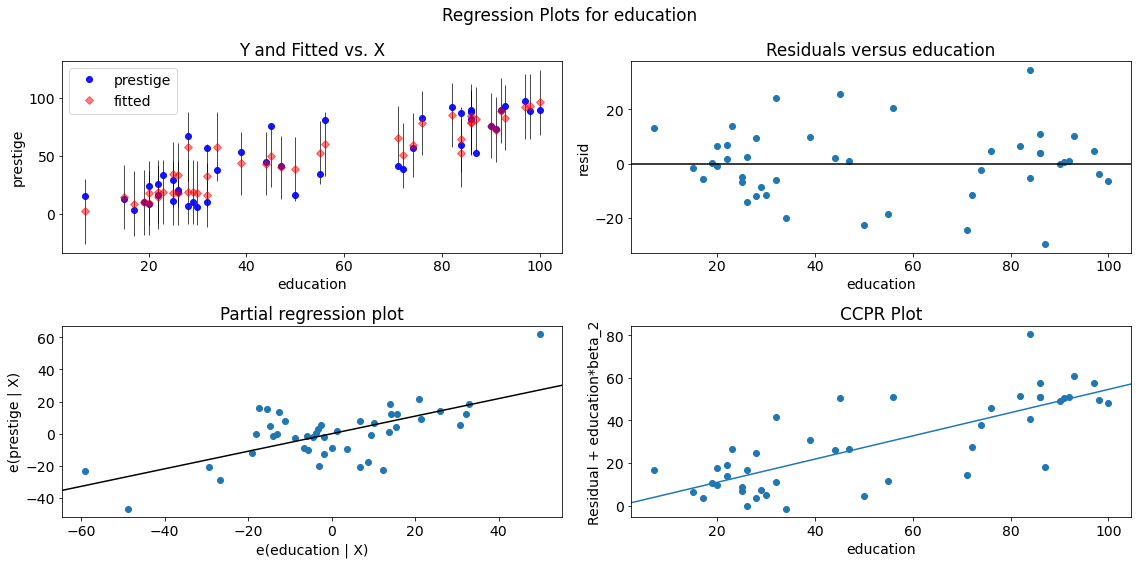

In [11]:
fig = sm.graphics.plot_regress_exog(prestige_model, "education")
fig.tight_layout(pad=1.0)

## Fit Plot
The plot_fit function plots the fitted values versus a chosen independent variable. It includes prediction confidence intervals and optionally plots the true dependent variable.

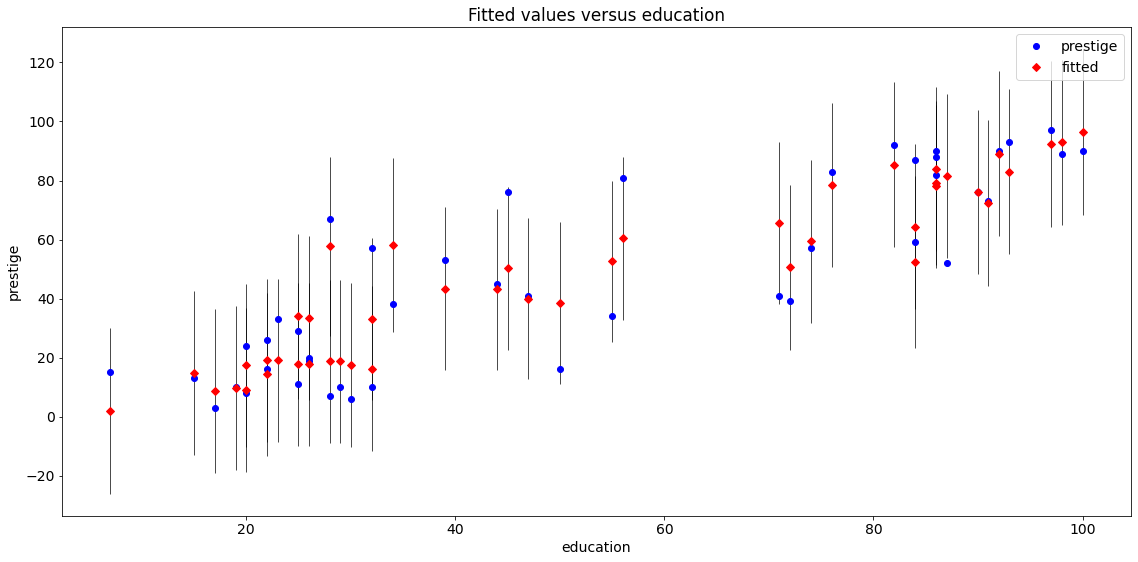

In [12]:
fig = sm.graphics.plot_fit(prestige_model, "education")
fig.tight_layout(pad=1.0)

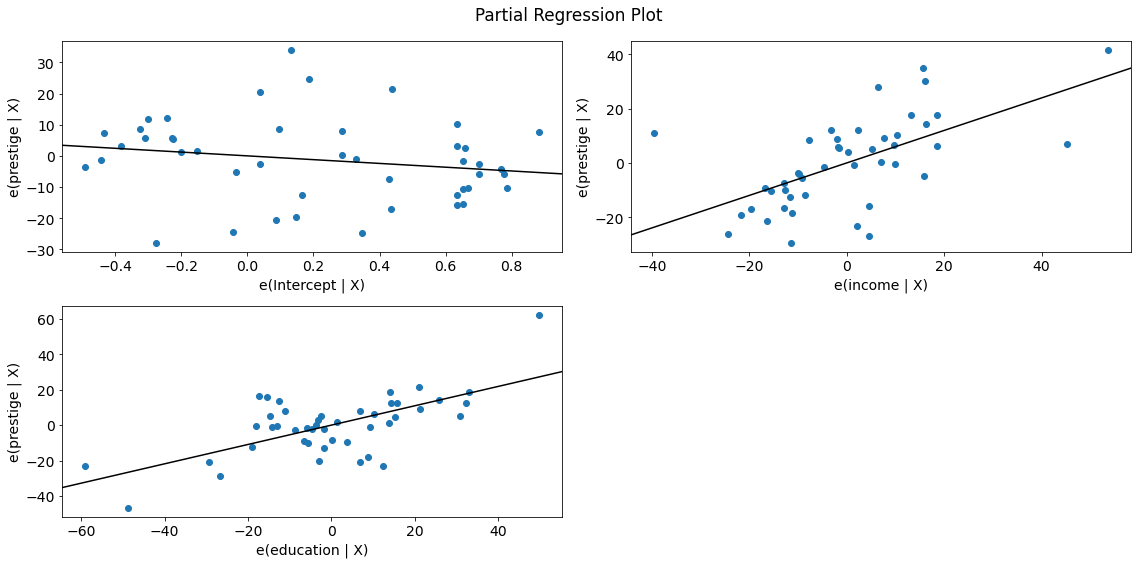

In [13]:
fig = sm.graphics.plot_partregress_grid(prestige_model)
fig.tight_layout(pad=1.0)

### Leverage residual plot

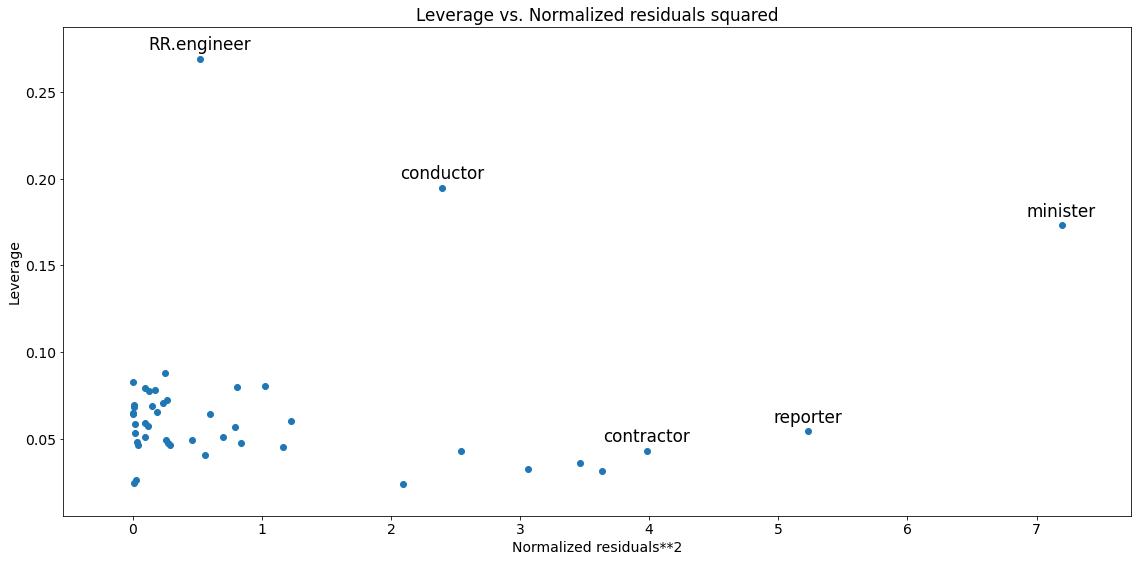

In [14]:
fig = sm.graphics.plot_leverage_resid2(prestige_model)
fig.tight_layout(pad=1.0)

In [ ]:
## Influence Plot

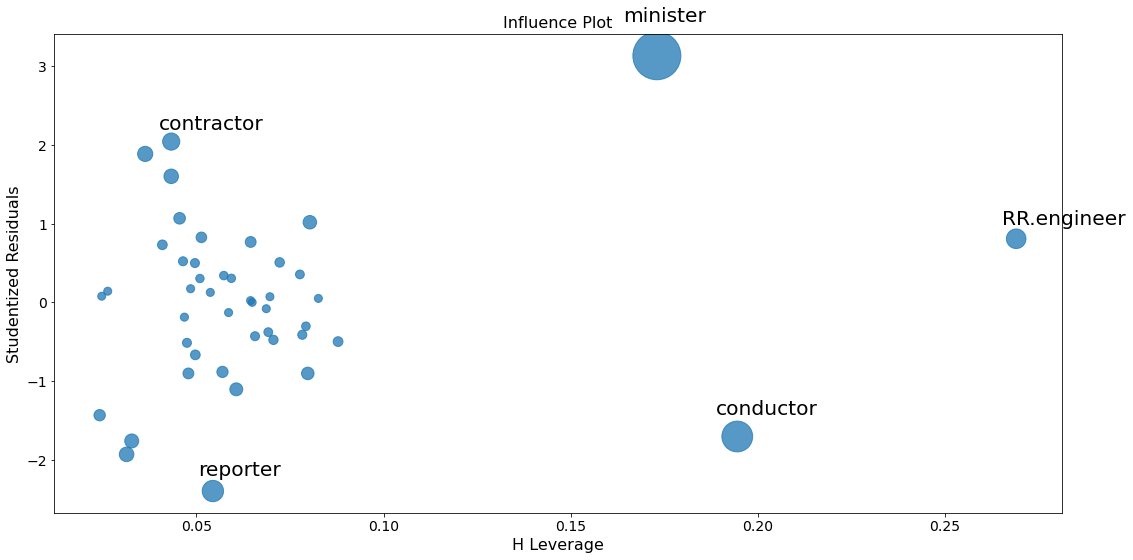

In [15]:
fig = sm.graphics.influence_plot(prestige_model)
fig.tight_layout(pad=1.0)

## Using robust regression to correct for outliers.
```python
from statsmodels.formula.api import rlm
```

Resources
- https://www.scikit-yb.org/en/latest/about.html
- https://www.statsmodels.org/stable/examples/notebooks/generated/regression_plots.html